<a href="https://colab.research.google.com/github/denis911/image-classification-transfer-learning-pytorch-keras-comparison/blob/main/Pytorch_ML_zoomcamp_08_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download dataset and pre-trained image classifier model with 1000 classes

In [1]:
# Original notebook is here -
# https://github.com/DataTalksClub/machine-learning-zoomcamp/tree/master/08-deep-learning/pytorch
# workshop video is here -
# https://www.youtube.com/watch?v=Ne25VujHRLA

!pip install keras_image_helper # run once
!nvidia-smi # nvidia system information for T4 Tesla GPU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 83.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.5 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.5 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.5 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_ve

Thu Nov 27 19:43:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# !pip list # to view all packages preinstalled in google colab environment

In [ ]:
# Download dataset - clothing images annotated and sorted by category
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

# The dataset contains:

# 10 clothing categories (dress, hat, longsleeve, outwear, pants, shirt, shoes, shorts, skirt, t-shirt)
# Training, validation, and test splits
# Pre-organized directory structure

fatal: destination path 'clothing-dataset-small' already exists and is not an empty directory.


In [ ]:
import torch

In [ ]:
from PIL import Image

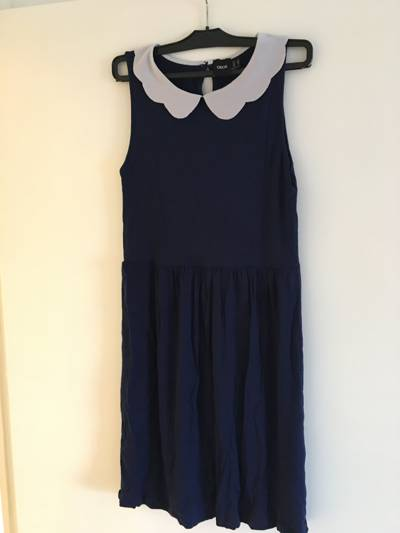

In [ ]:
img = Image.open('/content/clothing-dataset-small/train/dress/009b3c31-fb62-45c0-be9a-37a5c238cb88.jpg')
img # We use PIL - Pillow library to download and manage images

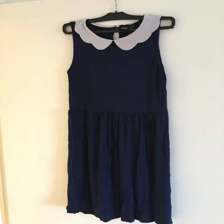

In [ ]:
img.resize((224, 224))
# Prob I used it before for Kaya - to speed up image upload?

array([[[207, 206, 186],
        [209, 207, 187],
        [209, 208, 188],
        ...,
        [227, 221, 209],
        [226, 220, 208],
        [225, 219, 207]],

       [[207, 204, 183],
        [209, 206, 184],
        [209, 206, 185],
        ...,
        [227, 221, 209],
        [226, 220, 208],
        [225, 219, 207]],

       [[208, 201, 179],
        [209, 202, 180],
        [209, 203, 181],
        ...,
        [227, 221, 209],
        [226, 220, 208],
        [225, 219, 207]],

       ...,

       [[253, 253, 254],
        [255, 249, 237],
        [250, 224, 191],
        ...,
        [233, 233, 231],
        [233, 233, 231],
        [233, 233, 231]],

       [[250, 254, 254],
        [255, 252, 239],
        [249, 227, 193],
        ...,
        [233, 233, 233],
        [233, 233, 233],
        [233, 233, 233]],

       [[250, 254, 254],
        [255, 252, 239],
        [249, 227, 193],
        ...,
        [233, 233, 233],
        [233, 233, 233],
        [233, 233, 233]]], shape=(224, 224, 3), dtype=uint8)
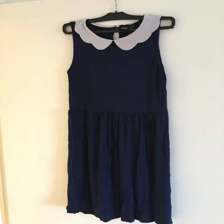

In [ ]:
import numpy as np
X = np.array(img.resize((224, 224)))
# click on show/hide data to see actual numbers - how cool is that )))
X

In [ ]:
X.shape # (224, 224, 3) image resized to 224x224 pixels with RGB - 3 color depth

(224, 224, 3)

In [ ]:
import torch
import torchvision.models as models
from torchvision import transforms
import numpy as np

# Load pre-trained model
model = models.mobilenet_v2(weights='IMAGENET1K_V1')
model.eval() # model could be used for training or for evaluation (eval)

# Preprocessing for MobileNetV2
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
# after pre-trained model loaded lets predict something:

img = Image.open('clothing-dataset-small/train/pants/0098b991-e36e-4ef1-b5ee-4154b21e2a92.jpg')
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

# Make prediction
with torch.no_grad():
    output = model(batch_t)

# Get top predictions
_, indices = torch.sort(output, descending=True)

In [ ]:
# how to find out what is predicted - we need a dictionary for this model

!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt -O imagenet_classes.txt

# Load ImageNet class names
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

# Get top 5 predictions
top5_indices = indices[0, :5].tolist()
top5_classes = [categories[i] for i in top5_indices]

print("Top 5 predictions:")
for i, class_name in enumerate(top5_classes):
    print(f"{i+1}: {class_name}")

--2025-11-26 22:15:36--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2025-11-26 22:15:36 (86.4 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]

Top 5 predictions:
1: jean
2: suit
3: cardigan
4: sweatshirt
5: overskirt


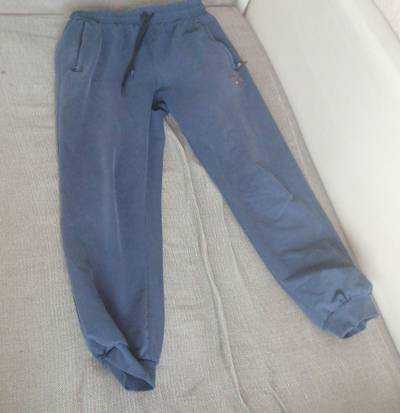

In [ ]:
# Top 5 predictions:
# 1: jean
# 2: suit
# 3: cardigan
# 4: sweatshirt
# 5: overskirt

img

In [ ]:
# preprocess(img) # what happens to image on the preprocessing pipeline
# tensor([[[0.7762, 0.7933, 0.7419,  ..., 1.8722, 1.8208, 1.7865],...
# because neural nets like small numbers in 0..1 scale...

# what model actually predicts - it predicts probability our image belong to
# one of more than a thousand classes, and we choose top 5
# indices
# tensor([[608, 834, 474, 841, 689, 824, 501, 885, 906, 869, 601, 911, ...
# and we need origo dict to map class codes to image classes
top5_indices = indices[0, :5].tolist()
top5_indices

[608, 834, 474, 841, 689]

In [ ]:
top5_classes = [categories[i] for i in top5_indices]
top5_classes

['jean', 'suit', 'cardigan', 'sweatshirt', 'overskirt']

## Transfer learning

In [ ]:
# imagenet_classes.txt
# - double-click on it the left directory widget to see  contents

# Lets fine tune this pretrained model

# Transfer Learning

# Transfer Learning reuses a model trained on one task (ImageNet) for a different task (clothing classification).

# Approach:

# Load pre-trained model (feature extractor)
# Remove original classification head
# Freeze convolutional layers
# Add custom layers for our task
# Train only the new layers

# STEP 0 - Custom Dataset Class
# First, create a PyTorch Dataset to load images:

import os
from torch.utils.data import Dataset
from PIL import Image

class ClothingDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.classes = sorted(os.listdir(data_dir))
        self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}

        for label_name in self.classes:
            label_dir = os.path.join(data_dir, label_name)
            for img_name in os.listdir(label_dir):
                self.image_paths.append(os.path.join(label_dir, img_name))
                self.labels.append(self.class_to_idx[label_name])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label



In [ ]:
# STEP 1 - Simple Preprocessing

from torchvision import transforms

input_size = 224

# ImageNet normalization values
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Simple transforms - just resize and normalize
train_transforms = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

val_transforms = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])



In [ ]:
# STEP 2 - Create DataLoaders

from torch.utils.data import DataLoader

train_dataset = ClothingDataset(
    data_dir='./clothing-dataset-small/train',
    transform=train_transforms
)

val_dataset = ClothingDataset(
    data_dir='./clothing-dataset-small/validation',
    transform=val_transforms
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [ ]:
# STEP 3 - Build the Model

import torch.nn as nn
import torchvision.models as models

class ClothingClassifierMobileNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ClothingClassifierMobileNet, self).__init__()

        # Load pre-trained MobileNetV2
        self.base_model = models.mobilenet_v2(weights='IMAGENET1K_V1')

        # Freeze base model parameters
        for param in self.base_model.parameters():
            param.requires_grad = False

        # Remove original classifier
        self.base_model.classifier = nn.Identity()

        # Add custom layers
        self.global_avg_pooling = nn.AdaptiveAvgPool2d((1, 1))
        self.output_layer = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.base_model.features(x)
        x = self.global_avg_pooling(x)
        x = torch.flatten(x, 1)
        x = self.output_layer(x)
        return x



In [ ]:
# STEP 4 - train the Model

import torch
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ClothingClassifierMobileNet(num_classes=10)
model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [ ]:
# # STEP 5 - Now train it - switch Colab to T4 GPU

# # Training loop
# num_epochs = 10

# for epoch in range(num_epochs):
#     # Training phase
#     model.train()  # Set the model to training mode
#     running_loss = 0.0
#     correct = 0
#     total = 0

#     # Iterate over the training data
#     for inputs, labels in train_loader:
#         # Move data to the specified device (GPU or CPU)
#         inputs, labels = inputs.to(device), labels.to(device)

#         # Zero the parameter gradients to prevent accumulation
#         optimizer.zero_grad()
#         # Forward pass
#         outputs = model(inputs)
#         # Calculate the loss
#         loss = criterion(outputs, labels)
#         # Backward pass and optimize
#         loss.backward()
#         optimizer.step()

#         # Accumulate training loss
#         running_loss += loss.item()
#         # Get predictions
#         _, predicted = torch.max(outputs.data, 1)
#         # Update total and correct predictions
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

#     # Calculate average training loss and accuracy
#     train_loss = running_loss / len(train_loader)
#     train_acc = correct / total

#     # Validation phase
#     model.eval()  # Set the model to evaluation mode
#     val_loss = 0.0
#     val_correct = 0
#     val_total = 0

#     # Disable gradient calculation for validation
#     with torch.no_grad():
#         # Iterate over the validation data
#         for inputs, labels in val_loader:
#             # Move data to the specified device (GPU or CPU)
#             inputs, labels = inputs.to(device), labels.to(device)
#             # Forward pass
#             outputs = model(inputs)
#             # Calculate the loss
#             loss = criterion(outputs, labels)

#             # Accumulate validation loss
#             val_loss += loss.item()
#             # Get predictions
#             _, predicted = torch.max(outputs.data, 1)
#             # Update total and correct predictions
#             val_total += labels.size(0)
#             val_correct += (predicted == labels).sum().item()

#     # Calculate average validation loss and accuracy
#     val_loss /= len(val_loader)
#     val_acc = val_correct / val_total

#     # Print epoch results
#     print(f'Epoch {epoch+1}/{num_epochs}')
#     print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
#     print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

In [ ]:
# model # training cycle above takes 3-5 mins on T4 GPU on Colab

It's a lower-level framework, that's why we need to implement some of these things like calculating accuracy on validation.

The line optimizer.zero_grad() is crucial in the training loop.

In PyTorch, gradients are accumulated by default. This means that if you don't zero the gradients before calculating the gradients for the current batch, the gradients from the previous batch will be added to the gradients of the current batch. This would lead to incorrect updates to your model's parameters.

By calling optimizer.zero_grad(), you clear out the old gradients, ensuring that the gradients calculated during the loss.backward() call are only based on the current batch of data. This is essential for the optimizer to take the correct step during optimizer.step().

model.train() and model.eval() are needed to manage the behavior of certain layers during training and evaluation.

model.train() sets the model to training mode. In training mode, layers like Dropout and BatchNorm behave differently. Dropout layers are active (randomly dropping neurons), and BatchNorm layers update their running statistics (mean and variance) based on the current batch.

model.eval() sets the model to evaluation mode. In evaluation mode, Dropout layers are inactive (they pass through all neurons), and BatchNorm layers use their accumulated running statistics instead of the current batch statistics. This ensures consistent behavior during inference and prevents randomness from affecting the evaluation results.

In [ ]:
# STEP 6 - Let's put it inside a function so it's easier for us to call it:

def train_and_evaluate(model, optimizer, train_loader, val_loader, criterion, num_epochs, device):
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = val_correct / val_total

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
        print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

## Tuning the Learning Rate, best LR = 0.001

The learning rate controls how much to update model weights during training. It's one of the most important hyperparameters.

Analogy: Reading speed

Too fast: Skip details, poor understanding (may not converge)
Too slow: Never finish the book (training takes too long)
Just right: Good comprehension and efficiency
Experimentation approach:

Try multiple values: [0.0001, 0.001, 0.01, 0.1]
Train for a few epochs each
Compare validation accuracy
Choose the rate with best performance and smallest train/val gap

In [ ]:
# STEP 7 - tuning the model across diff learning rates:

from tqdm.auto  import tqdm

def make_model(learning_rate=0.01):
    model = ClothingClassifierMobileNet(num_classes=10)
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    return model, optimizer

learning_rates = [0.0001, 0.001, 0.01, 0.1]

# Training loop - 10-15 mins on colab T4
# The best learning rate is 0.001 (accuracy 0.815) in video
# my result is Val Acc: 0.8065 on the same 0.001 learning rate
num_epochs = 10

# for lr in tqdm(learning_rates):
#     print(f'\n=== Learning Rate: {lr} ===')
#     model, optimizer = make_model(learning_rate=lr)
#     train_and_evaluate(model, optimizer, train_loader, val_loader, criterion, num_epochs, device)



## Model Checkpointing

Checkpointing saves the model during training to:

-- Keep the best performing model

-- Resume training if interrupted

-- Avoid losing progress

Update the train function:

In [ ]:
def train_and_evaluate_with_checkpointing(model, optimizer, train_loader, val_loader, criterion, num_epochs, device, model_name_prefix="mobilenet_v2"):
    best_val_accuracy = 0.0  # Initialize variable to track the best validation accuracy

    for epoch in tqdm(range(num_epochs)):
        # Training phase
        model.train()  # Set the model to training mode
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total

        # Validation phase
        model.eval()  # Set the model to evaluation mode
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = val_correct / val_total

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
        print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

        # Checkpoint the model if validation accuracy improved
        if val_acc > best_val_accuracy:
            best_val_accuracy = val_acc
            checkpoint_path = f'{model_name_prefix}_size_inner_{model.inner.out_features}_{epoch+1:02d}_{val_acc:.3f}.pth'
            torch.save(model.state_dict(), checkpoint_path)
            print(f'Checkpoint saved: {checkpoint_path}')

## Adding Inner Layers, best size_inner=100

In [ ]:
# We can add intermediate dense layers between feature extraction and output:

class ClothingClassifierMobileNet(nn.Module):
    def __init__(self, size_inner=100, num_classes=10):
        super(ClothingClassifierMobileNet, self).__init__()

        self.base_model = models.mobilenet_v2(weights='IMAGENET1K_V1')

        for param in self.base_model.parameters():
            param.requires_grad = False

        self.base_model.classifier = nn.Identity()

        self.global_avg_pooling = nn.AdaptiveAvgPool2d((1, 1))
        self.inner = nn.Linear(1280, size_inner)  # New inner layer
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(size_inner, num_classes)

    def forward(self, x):
        x = self.base_model.features(x)
        x = self.global_avg_pooling(x)
        x = torch.flatten(x, 1)
        x = self.inner(x)
        x = self.relu(x)
        x = self.output_layer(x)
        return x

Experiment with different sizes:

Try: size_inner = [10, 100, 1000]

Larger layers: more capacity, may overfit

Smaller layers: faster, may underfit
Key points:

Inner layer uses ReLU activation

Output layer has no activation (logits)

CrossEntropyLoss applies softmax internally

In [ ]:
# Update make_model:

def make_model(learning_rate=0.001, size_inner=100):
    model = ClothingClassifierMobileNet(
        num_classes=10,
        size_inner=size_inner
    )
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    return model, optimizer

In [ ]:
# model

## Dropout Regularization

Dropout randomly drops neurons during training to prevent overfitting.

How it works:

Training: randomly set fraction of activations to 0

Inference: use all neurons (dropout disabled automatically)

Creates ensemble effect


Benefits:

-- Prevents relying on specific features

-- Forces learning robust patterns

-- Reduces overfitting

In [ ]:
class ClothingClassifierMobileNet(nn.Module):
    def __init__(self, size_inner=100, droprate=0.2, num_classes=10):
        super(ClothingClassifierMobileNet, self).__init__()

        self.base_model = models.mobilenet_v2(weights='IMAGENET1K_V1')

        for param in self.base_model.parameters():
            param.requires_grad = False

        self.base_model.classifier = nn.Identity()

        self.global_avg_pooling = nn.AdaptiveAvgPool2d((1, 1))
        self.inner = nn.Linear(1280, size_inner)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(droprate)  # Add dropout
        self.output_layer = nn.Linear(size_inner, num_classes)

    def forward(self, x):
        x = self.base_model.features(x)
        x = self.global_avg_pooling(x)
        x = torch.flatten(x, 1)
        x = self.inner(x)
        x = self.relu(x)
        x = self.dropout(x)  # Apply dropout
        x = self.output_layer(x)
        return x

In [ ]:
# Update our function:

def make_model(
        learning_rate=0.001,
        size_inner=100,
        droprate=0.2
):
    model = ClothingClassifierMobileNet(
        num_classes=10,
        size_inner=size_inner,
        droprate=droprate
    )
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    return model, optimizer


Experimentation:

Try: droprate = [0.0, 0.2, 0.5, 0.8]

Typical values: 0.2 to 0.5

Higher dropout may need more training epochs

(Our case: best droprate is 0.2)

In [ ]:
droprate = [0.0, 0.2, 0.5, 0.8]
# my code from 26.11.2025:

# for d in tqdm(droprate):
#   model, optimizer = make_model()
#   train_and_evaluate_with_checkpointing(model, optimizer, train_loader, val_loader, criterion, num_epochs, device, model_name_prefix="mobilenet_v2")

  # takes 10-15 mins to train on T4 GPU

## Data Augmentation

Data Augmentation artificially increases dataset size by applying random transformations to training images.

Common transformations:

Rotation

Horizontal/vertical flipping

Zooming (random cropping)

Shifting

Shearing

Important rules:

✅ Apply ONLY to training data

❌ Never augment validation/test data

In [ ]:
# Augmented Training Transforms

# Training transforms WITH augmentation
train_transforms = transforms.Compose([
    transforms.RandomRotation(10),           # Rotate up to 10 degrees
    transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),  # Zoom
    transforms.RandomHorizontalFlip(),       # Horizontal flip
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

# Validation transforms - NO augmentation, same as before
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

When to use augmentation:

1.   Small datasets
2.   Risk of overfitting
3.   Images can appear in different orientations

Tips:

Choose augmentations that make sense for your data

Too much augmentation can hurt performance

Usually requires longer training (more epochs)

If no improvement after ~20 epochs, don't use it

## Using the Trained Model

In [ ]:
# Loading a Saved Model

import glob, os

# Find best checkpoint
list_of_files = glob.glob('mobilenet_v2_*.pth')
latest_file = max(list_of_files, key=os.path.getctime)
print(f"Loading model from: {latest_file}")

# Load model
# model = ClothingClassifierMobileNet(size_inner=32, droprate=0.2, num_classes=10)
model = ClothingClassifierMobileNet(size_inner=100, droprate=0.2, num_classes=10)
model.load_state_dict(torch.load(latest_file))
model.to(device)
model.eval()

Loading model from: mobilenet_v2_size_inner_100_04_0.809.pth


ClothingClassifierMobileNet(
  (base_model): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16,

In [ ]:
# Making Predictions


from keras_image_helper import create_preprocessor
import numpy as np

def preprocess_pytorch_style(X):
    # X: shape (1, 224, 224, 3), dtype=float32, values in [0, 255]
    X = X / 255.0

    mean = np.array([0.485, 0.456, 0.406]).reshape(1, 3, 1, 1)
    std = np.array([0.229, 0.224, 0.225]).reshape(1, 3, 1, 1)

    # Convert NHWC → NCHW (batch, height, width, channels → batch, channels, height, width)
    X = X.transpose(0, 3, 1, 2)

    # Normalize
    X = (X - mean) / std

    return X.astype(np.float32)

preprocessor = create_preprocessor(preprocess_pytorch_style, target_size=(224, 224))

# Predict from URL
url = 'http://bit.ly/mlbookcamp-pants'
X = preprocessor.from_url(url)
X = torch.Tensor(X).to(device)

with torch.no_grad():
    pred = model(X).cpu().numpy()[0]

classes = [
    "dress", "hat", "longsleeve", "outwear", "pants",
    "shirt", "shoes", "shorts", "skirt", "t-shirt"
]

result = dict(zip(classes, pred.tolist()))
print(result)
# {'dress': 0.8125006556510925 ... )))


{'dress': 0.8125006556510925, 'hat': -5.8556647300720215, 'longsleeve': -0.4853156805038452, 'outwear': 0.7086395025253296, 'pants': 3.168220281600952, 'shirt': 0.2963709831237793, 'shoes': -3.4404377937316895, 'shorts': 1.3148353099822998, 'skirt': -0.45286422967910767, 't-shirt': -2.4059011936187744}


## Exporting to ONNX

ONNX (Open Neural Network Exchange) is a format for model interoperability.

Benefits:

-- Deploy on different platforms

-- Use optimized runtimes (ONNX Runtime)

-- Better inference performance

-- Language-agnostic deployment

In [ ]:
!pip install onnxscript

# Create dummy input
dummy_input = torch.randn(1, 3, 224, 224).to(device)

# Export to ONNX
onnx_path = "clothing_classifier_mobilenet_v2.onnx"

torch.onnx.export(
    model,
    dummy_input,
    onnx_path,
    verbose=True,
    input_names=['input'],
    output_names=['output'],
    dynamic_axes={
        'input': {0: 'batch_size'},
        'output': {0: 'batch_size'}
    }
)

print(f"Model exported to {onnx_path}")

/tmp/ipython-input-2631959262.py:9: UserWarning: # 'dynamic_axes' is not recommended when dynamo=True, and may lead to 'torch._dynamo.exc.UserError: Constraints violated.' Supply the 'dynamic_shapes' argument instead if export is unsuccessful.
  torch.onnx.export(


[torch.onnx] Obtain model graph for `ClothingClassifierMobileNet([...]` with `torch.export.export(..., strict=False)`...
[torch.onnx] Obtain model graph for `ClothingClassifierMobileNet([...]` with `torch.export.export(..., strict=False)`... ✅
[torch.onnx] Run decomposition...
[torch.onnx] Run decomposition... ✅
[torch.onnx] Translate the graph into ONNX...
[torch.onnx] Translate the graph into ONNX... ✅
Applied 105 of general pattern rewrite rules.
Model exported to clothing_classifier_mobilenet_v2.onnx


# Task
Train a MobileNetV2-based image classifier for 10 epochs using checkpointing, experimenting with different inner layer sizes [10, 100, 1000] in the custom classification head to evaluate their impact on performance.

## Train with different inner layer sizes

### Subtask:
Iterate through 'size_inner' values [10, 100, 1000], create a new model and optimizer for each, and then train and evaluate the model using checkpointing for 10 epochs. This will help determine the optimal size for the inner layer.


## Summary:

### Data Analysis Key Findings
The provided process outlines a planned experiment to evaluate the impact of different inner layer sizes on the performance of a MobileNetV2-based image classifier. Specifically, the experiment will iterate through inner layer sizes of 10, 100, and 1000. For each size, a new model will be created, trained for 10 epochs with checkpointing, and evaluated.

### Insights or Next Steps
*   The next step is to execute the planned experiment, training and evaluating models with the specified inner layer sizes.
*   The primary goal of this experiment is to identify the optimal inner layer size for the custom classification head to enhance model performance.
